<img src="./Img/logo_UTN.svg" align="right" width="150" /> 

#### Teoría de Circuitos II
# Tarea Semanal 7
## 05-09-2023
#### Autor: Yañez $\lambda$, Joaquin

## Consigna

Esta tarea se centra en la implementación de filtros digitales, se evalua la transformación de un filtro analógico a uno digital, implementación de filtros FIR e IIR y por último el análisis de un diagrama en bloques. Dos de los ejercicios enviados se encuentran en la guía de ejercicios de la cátedra y el tercero es uno aparte propuesto para esat tarea semanal. Como se tratan de filtros digitales el análisis circuital carece de sentido de hacerlo, en su lugar se realizará un análisis con la herramienta de diseño de filtros de python (pyfda).

### Ejercicio 1:

Se pide realizar el 2 ejercicio de la guía de tran:

![Texto alternativo](./Img/Ej1_consigna.png "Imagen 1. Consigna del 1er punto")

<center>  Imagen 1. Consigna del 1er punto </center>

Se observa que se pide transformar un filtro butter análógico a uno digital con distintas frecuencias de corte y frecuencias de muestreo por lo que en papel se aplicó la transferencia bilineal a un filtro de segundo orden generalizado y luego se lo especifíca para el caso en partiular pedido.

A continuación se muestra el análisis del problema en papel:

In [1]:
from IPython.display import IFrame
IFrame("./Src/TS7_E1.pdf", width=1000, height=800)

Una vez llegado al resultado se aprecia que todos los parámetros del filtro dependen de la $f_s$ elegida y de su relación con la $ \omega_c $ del filtro elegido. Se observa como con la convinación de valores del punto A) los polos se acercan mucho a la circunferencia unitaria.


### Simulación numérica

In [3]:
import scipy.signal as sig
from pytc2.sistemas_lineales import analyze_sys


### DEFINICIÓN DE VARIABLES
fc = 1 # En kHz
fs = 100 #En kHz 

Ww = fs


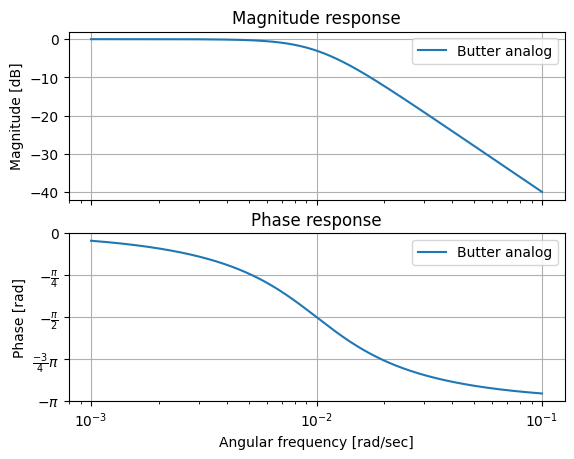

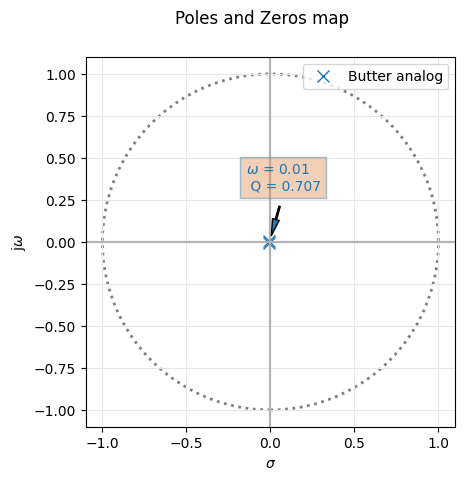

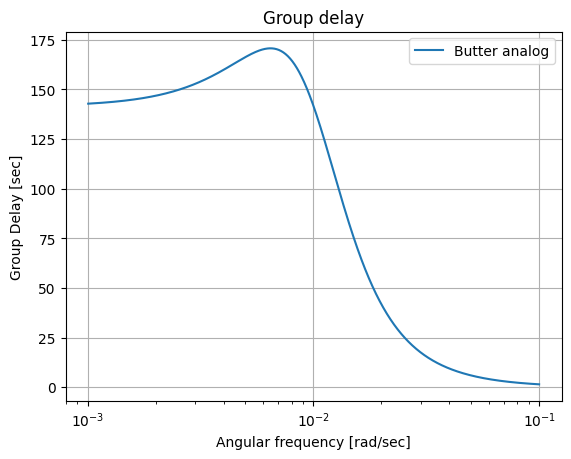

In [4]:
### ARMADO DEL FILTRO ANALÓGICO

zz, pp, kk = sig.buttap(2)
zz, pp, kk = sig.lp2lp_zpk(zz, pp, kk, wo = fc/Ww)
### Se dezplaza el filtro original ya que la normalización se hace para que K=2

num, den = sig.zpk2tf(zz, pp, kk)
TF = sig.TransferFunction(num, den)
analyze_sys(TF, sys_name = "Butter analog")

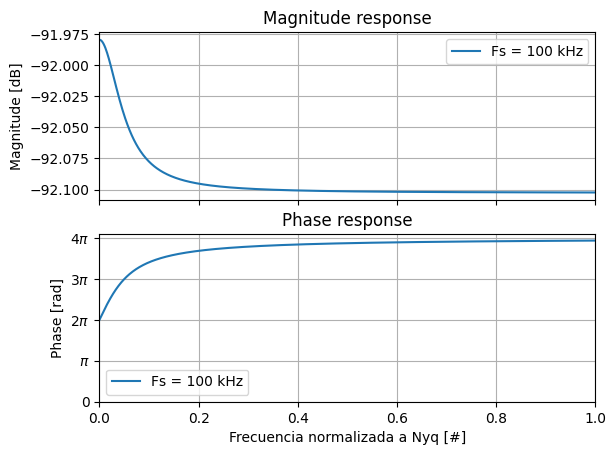

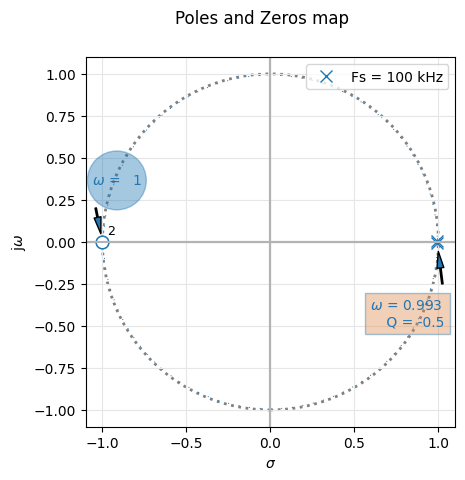

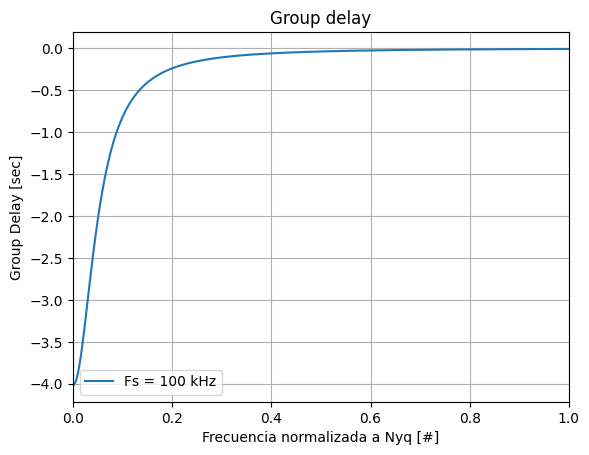

In [5]:
### ARMMADO DEL FILTRO DIGITAL

z, p, k = sig.bilinear_zpk(zz, pp, kk, fs/Ww)

numz , denz = sig.zpk2tf(z, p, k)
TFZ = sig.TransferFunction(numz, denz)

analyze_sys(TFZ, sys_name = "Fs = 100 kHz", digital = True)

Se observa como era de esperarse que los polos se acerquen considerablemente a la circunferencia unitaria, además como la fs es tan alta se mapea principalmente la banda de detenida por lo que la atenuación es considerable en casi todas las frecuencias.

A continuación se realiza el mismo análisis pero para una $f_s$ 10 veces menor.

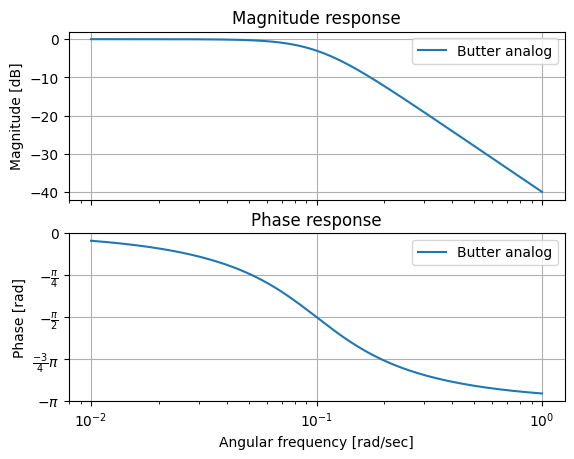

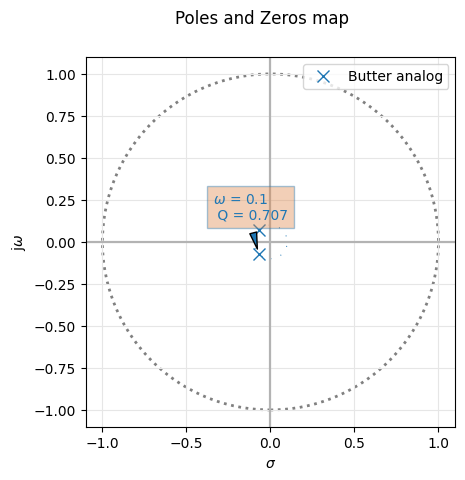

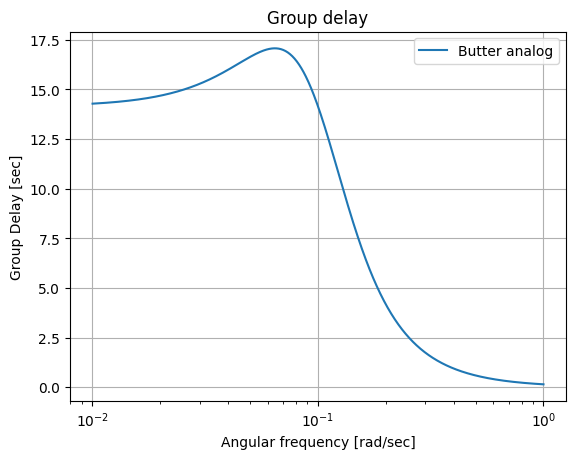

In [6]:
### ARMADO DEL BUTTER ANALOGICO DE NUEVO
fs = 10 # en kHz
Ww = fs

zz, pp, kk = sig.buttap(2)
zz, pp, kk = sig.lp2lp_zpk(zz, pp, kk, wo = fc/Ww)
### Se dezplaza el filtro original ya que la normalización se hace para que K=2

num, den = sig.zpk2tf(zz, pp, kk)
TF = sig.TransferFunction(num, den)
analyze_sys(TF, sys_name = "Butter analog")

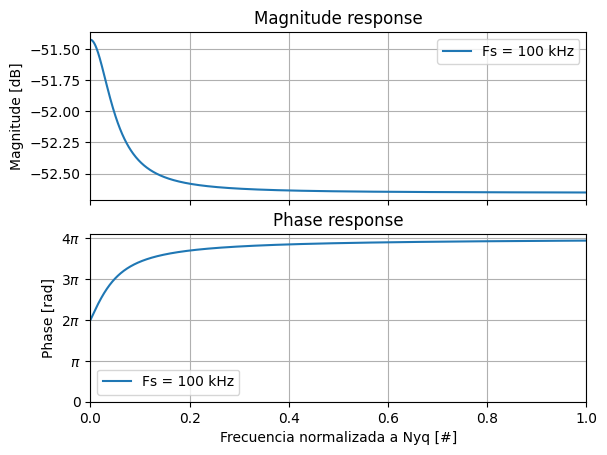

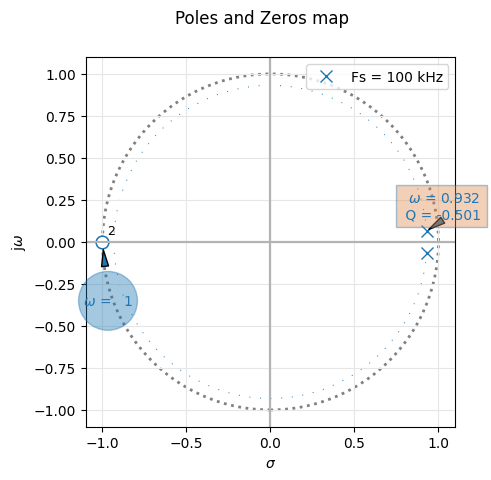

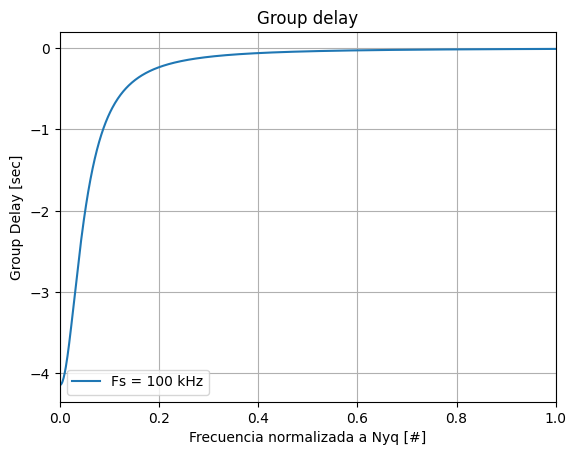

In [7]:
### ARMMADO DEL FILTRO DIGITAL

z, p, k = sig.bilinear_zpk(zz, pp, kk, fs/Ww)

numz , denz = sig.zpk2tf(z, p, k)
TFZ = sig.TransferFunction(numz, denz)

analyze_sys(TFZ, sys_name = "Fs = 100 kHz", digital = True)

Se observa como los polos se alejan un poco de la circunferencia unitaria pero estos siguen bastantes cercano

***

### Ejercicio 2:

La consigna del segundo ejercicio es la siguiente:

![Texto alternativo](./Img/Ej2_consigna.png "Imagen 4. Consigna del 2do punto")

<center>  Imagen 4. Consigna del 2do punto </center>

Se pide analizar un circuito pasivo utilizando la teoría de cuadripolos, para esto se plantearan distintos cuadripolos elementales y su correspondiente interconexión para llegar a un juego de parámetros úinco del circuito y luego con los parámetros T se puede obtener la transferencia de tensión realizando la inversión del parámetro A. El análisis en papel es el siguiente:

In [2]:
IFrame("./Src/TS6_E2.pdf", width=1000, height=800)

Se observa como la transferencia obtenida es un circuito PasaBajos, de antemano esto es esperable ya que tenemos dos inductores en serie que a baja frecuencia presentan una baja impedancia. Además el circuito presenta 3 elementos reactivos que coincide con la cantidad de polos que presenta la transferencia.
Además de la obtención de la transerencia se confeccionó la Matriz Admitancia Indefinida del circuito que se utilizará para obtener la transferencia en un análisis numérico a continuación

## Simulación numérica


In [3]:
## Librerías y funciones que se utilizaran durante el código
import sympy as sp

from pytc2.cuadripolos import calc_MAI_vtransf_ij_mn
from pytc2.general import print_latex


In [4]:
'''    
+ Numeración de los nodos de 0 a n=3

    0-------+--L1----2---L3---1
                     |       |
                    C2       G
                    |       |
    3--------------+--------
    
'''    
## Definición de las variables simbólicas
s = sp.symbols('s', complex=True)
L1, C2, L3, G = sp.symbols('L1 C2 L3 G', real=True, positive=True)


In [5]:
## Armo la MAI

##              Nodos: 0            1              2               3
Ymai = sp.Matrix([  
                    [ 1/(s*L1),       0,              -1/(s*L1),                  0    ],
                    [     0,      1/(s*L3) + G,       -1/(s*L3),                 -G    ],
                    [ -1/(s*L1),   -1/(s*L3) ,   s*C2 + 1/(s*L3) + 1/(s*L1),    -s*C2  ],
                    [     0,           -G,              -s*C2,                G + s*C2 ]
                 ])
print_latex(sp.latex(Ymai))

<IPython.core.display.Math object>

In [6]:
#con_detalles = False
con_detalles = True

Vmai = calc_MAI_vtransf_ij_mn( Ymai, 1, 3, 0, 3, verbose=con_detalles)


print_latex( r'T^{{ {:d}{:d} }}_{{ {:d}{:d} }} = '.format(3, 1, 0, 1) +  sp.latex(sp.simplify(Vmai)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Se puede observar como la transferencia obtenida que en papel si se realiza el factor común correspondiente para obtener el polinomio con el término de mayor orden unitario. Por último se realizó una simulación circuital de la red para corroborar que la transferencia sea correcta.

## Simulación circuital

El esquemático planteado en Spice fue el siguiente:


![Texto alternativo](./Img/Ej2_esq.png "Imagen 5. Esquemático planteado en Spice")

<center>  Imagen 5. Esquemático planteado en Spice </center>

El resultado de la simulación es el siguiente:

![Texto alternativo](./Img/Ej2_out.png "Imagen 6. Salida de la simulación en Spice")

<center>  Imagen 6. Salida de la simulación en Spice </center>

Se observa la salida pasabajos esperada, además se puede notar que en la frecuencia de corte se tiene una atenuación de aprosimadamente $3dB$ por lo que estamos en presencia de un filtro butterworth de 3er orden, esto también se expresa en el desarrollor de fase de $-270°$ que se debe a $90°$ por cada polo. Por último como es de esperarse la pendiente en la bada de detenida es de $60dB/dec$
